# 14 - Advanced topics - Cement Pavers albedo example

This journal creates a paver underneath the single-axis trackers, and evaluates the improvement for one day -- June 17th with and without the pavers for a location in Davis, CA.

![Paver](../images_wiki/AdvancedJournals/Pavers.PNG)

Measurements:
![Paver](../images_wiki/AdvancedJournals/Pavers_Geometry.PNG)

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'Pavers')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

try:
    os.stat(testfolder)
except:
    os.mkdir(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\NewMat


In [2]:
from bifacial_radiance import *   
import numpy as np

In [3]:
timestamp = 4020 # Noon, June 17th. 
simulationname = 'PVEL_Davis'

#Location:
lat = 38.5449 # Davis, CA
lon = -121.7405 # Davis, CA
# MakeModule Parameters
moduletype='60cellmod'
numpanels = 1  # AgriPV site has 3 modules along the y direction (N-S since we are facing it to the south) .
x = 0.95  
y = 1.838
xgap = 0.02# Leaving 2 centimeters between modules on x direction
ygap = 0.0 # 1 - up 
zgap = 0.06 # gap between modules and torquetube.

# Other default values:

# TorqueTube Parameters
axisofrotationTorqueTube=True
torqueTube = False
cellLevelModule = True

numcellsx = 6
numcellsy = 10
xcell = 0.156
ycell = 0.158
xcellgap = 0.015
ycellgap = 0.015

sensorsy = numcellsy   # one sensor per cell

cellLevelModuleParams = {'numcellsx': numcellsx, 'numcellsy':numcellsy, 
                         'xcell': xcell, 'ycell': ycell, 'xcellgap': xcellgap, 'ycellgap': ycellgap}

# SceneDict Parameters
gcr = 0.33 # m
albedo = 0.2  #'grass'     # ground albedo
hub_height = 1.237 # m  
nMods = 20 # six modules per row.
nRows = 3  # 3 row

azimuth_ang = 90 # Facing east 


demo = RadianceObj(simulationname,path = testfolder)  # Create a RadianceObj 'object'
demo.setGround(albedo) # input albedo number or material name like 'concrete'.  To see options, run this without any input.
epwfile = demo.getEPW(lat, lon) # NJ lat/lon 40.0583° N, 74.4057
metdata = demo.readEPW(epwfile) # read in the EPW weather data from above
moduleDict=demo.makeModule(name=moduletype,x=x,y=y,numpanels = numpanels, xgap=xgap, ygap=ygap, cellLevelModuleParams = cellLevelModuleParams)


path = C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\NewMat
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CA_Sacramento.Metro.AP.724839_TMY3.epw
 ... OK!
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: 60cellmod
Pre-existing .rad file objects\60cellmod.rad will be overwritten
Module was shifted by 0.078 in X to avoid sensors on air
This is a Cell-Level detailed module with Packaging Factor of 0.85 %
Module 60cellmod updated in module.json


In [4]:
description = 'Sherman Williams "Chantilly White" acrylic paint'
materialpav = 'sw_chantillywhite'
Rrefl = 0.5
Grefl = 0.5 
Brefl = 0.5
demo.addMaterial(material=materialpav, Rrefl=Rrefl, Grefl=Grefl, Brefl=Brefl, comment=description)

Added material sw_chantillywhite to file ground.rad


### Simulation without Pavers

In [5]:
metdata.datetime[timestamp]

Timestamp('2001-06-17 13:00:00-0800', tz='pytz.FixedOffset(-480)', freq='H')

In [6]:
metdata.datetime[timestamp-7]

Timestamp('2001-06-17 06:00:00-0800', tz='pytz.FixedOffset(-480)', freq='H')

In [7]:
metdata.datetime[timestamp+6]

Timestamp('2001-06-17 19:00:00-0800', tz='pytz.FixedOffset(-480)', freq='H')

In [8]:
demo.gendaylit(timestamp)
tilt = demo.getSingleTimestampTrackerAngle(metdata, timeindex=timestamp, gcr=gcr, 
                                   axis_azimuth=180, axis_tilt=0, 
                                   limit_angle=60, backtrack=True)
# create a scene with all the variables
sceneDict = {'tilt':tilt,'gcr': gcr,'hub_height':hub_height,'azimuth':azimuth_ang, 'module_type':moduletype, 'nMods': nMods, 'nRows': nRows}  
scene = demo.makeScene(moduletype=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.
octfile = demo.makeOct(demo.getfilelist())  # makeOct combines all of the ground, sky and object fil|es into a .oct file.

01_06_17_13_00
Created PVEL_Davis.oct


In [9]:
analysis = AnalysisObj(octfile, demo.name)  # return an analysis object including the scan dimensions for back irradiance
frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
analysis.analysis(octfile, simulationname+"_noPavers", frontscan, backscan)  # compare the back vs front irradiance  
print("Simulation without Pavers Finished")

Linescan in process: PVEL_Davis_noPavers_Front
Linescan in process: PVEL_Davis_noPavers_Back
Saved: results\irr_PVEL_Davis_noPavers.csv
Simulation without Pavers Finished


## Looping on the day

In [10]:
j=0
for i in range (-7, 7):
    j+=1
    timess = timestamp+i
    demo.gendaylit(timess)
    tilt = demo.getSingleTimestampTrackerAngle(metdata, timeindex=timess, gcr=gcr, 
                                       axis_azimuth=180, axis_tilt=0, 
                                       limit_angle=60, backtrack=True)
    # create a scene with all the variables
    sceneDict = {'tilt':tilt,'gcr': gcr,'hub_height':hub_height,'azimuth':azimuth_ang, 'module_type':moduletype, 'nMods': nMods, 'nRows': nRows}  
    scene = demo.makeScene(moduletype=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.
    octfile = demo.makeOct(demo.getfilelist())  # makeOct combines all of the ground, sky and object fil|es into a .oct file
    frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
    analysis.analysis(octfile, simulationname+"_noPavers_"+str(j), frontscan, backscan)  # compare the back vs front irradiance  
    

01_06_17_06_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_noPavers_1_Front
Linescan in process: PVEL_Davis_noPavers_1_Back
Saved: results\irr_PVEL_Davis_noPavers_1.csv
01_06_17_07_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_noPavers_2_Front
Linescan in process: PVEL_Davis_noPavers_2_Back
Saved: results\irr_PVEL_Davis_noPavers_2.csv
01_06_17_08_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_noPavers_3_Front
Linescan in process: PVEL_Davis_noPavers_3_Back
Saved: results\irr_PVEL_Davis_noPavers_3.csv
01_06_17_09_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_noPavers_4_Front
Linescan in process: PVEL_Davis_noPavers_4_Back
Saved: results\irr_PVEL_Davis_noPavers_4.csv
01_06_17_10_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_noPavers_5_Front
Linescan in process: PVEL_Davis_noPavers_5_Back
Saved: results\irr_PVEL_Davis_noPavers_5.csv
01_06_17_11_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_noPavers_6_Front
Linescan in p

### Simulation With Pavers

In [11]:
demo.gendaylit(timestamp)
tilt = demo.getSingleTimestampTrackerAngle(metdata, timeindex=timestamp, gcr=gcr, 
                                   axis_azimuth=180, axis_tilt=0, 
                                   limit_angle=60, backtrack=True)
# create a scene with all the variables
sceneDict = {'tilt':tilt,'gcr': gcr,'hub_height':hub_height,'azimuth':azimuth_ang, 'module_type':moduletype, 'nMods': nMods, 'nRows': nRows}  
scene = demo.makeScene(moduletype=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.

01_06_17_13_00


In [12]:
torquetubelength = moduleDict['scenex']*(nMods) 
pitch = demo.moduleDict['sceney']/gcr
startpitch = -pitch * (nRows-1)/2
p_w = 0.947 # m
p_h = 0.092 # m
p_w2 = 0.187 # m
p_h2 = 0.184 # m
offset_w1y = -(p_w/2)+(p_w2/2)
offset_w2y = (p_w/2)-(p_w2/2)

customObjects = []
for i in range (0, nRows):    
    name='PAVER'+str(i)
    text='! genbox {} paver{} {} {} {} | xform -t {} {} 0 | xform -t {} 0 0'.format(materialpav, i, 
                                    p_w, torquetubelength, p_h, 
                                    -p_w/2, (-torquetubelength+moduleDict['sceney'])/2.0,
                                    startpitch+pitch*i)
    text += '\r\n! genbox {} paverS1{} {} {} {} | xform -t {} {} 0 | xform -t {} 0 0'.format(materialpav, i,
                                    p_w2, torquetubelength, p_h2, 
                                    -p_w2/2+offset_w1y, (-torquetubelength+moduleDict['sceney'])/2.0,
                                    startpitch+pitch*i)
    text += '\r\n! genbox {} paverS2{} {} {} {} | xform -t {} {} 0 | xform -t {} 0 0'.format(materialpav, i,
                                    p_w2, torquetubelength, p_h2, 
                                    -p_w2/2+offset_w2y, (-torquetubelength+moduleDict['sceney'])/2.0,
                                    startpitch+pitch*i)

    customObject = demo.makeCustomObject(name,text)
    customObjects.append(customObject)
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")


Custom Object Name objects\PAVER0.rad

Custom Object Name objects\PAVER1.rad

Custom Object Name objects\PAVER2.rad


In [13]:
demo.makeOct()

Created PVEL_Davis.oct


'PVEL_Davis.oct'

### rvu -vf views\front.vp -e .01 -pe 0.01 -vp -5 -14 1 -vd 0 0.9946 -0.1040 PVEL_Davis.oct

In [14]:
analysis = AnalysisObj(octfile, demo.name)  # return an analysis object including the scan dimensions for back irradiance
frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
analysis.analysis(octfile, simulationname+"_WITHPavers", frontscan, backscan)  # compare the back vs front irradiance  
print("Simulation WITH Pavers Finished")


Linescan in process: PVEL_Davis_WITHPavers_Front
Linescan in process: PVEL_Davis_WITHPavers_Back
Saved: results\irr_PVEL_Davis_WITHPavers.csv
Simulation WITH Pavers Finished


## LOOP WITH PAVERS

In [15]:
customObjects

['objects\\PAVER0.rad', 'objects\\PAVER1.rad', 'objects\\PAVER2.rad']

In [16]:
j=0
for i in range (-7, 7):
    j+=1
    timess = timestamp+i
    demo.gendaylit(timess)
    tilt = demo.getSingleTimestampTrackerAngle(metdata, timeindex=timess, gcr=gcr, 
                                       axis_azimuth=180, axis_tilt=0, 
                                       limit_angle=60, backtrack=True)
    # create a scene with all the variables
    sceneDict = {'tilt':tilt,'gcr': gcr,'hub_height':hub_height,'azimuth':azimuth_ang, 'module_type':moduletype, 'nMods': nMods, 'nRows': nRows}  
    scene = demo.makeScene(moduletype=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.
    # Appending Pavers here
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObjects[0], text="!xform -rz 0")
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObjects[1], text="!xform -rz 0")
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObjects[2], text="!xform -rz 0")
    octfile = demo.makeOct(demo.getfilelist())  # makeOct combines all of the ground, sky and object fil|es into a .oct file
    frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
    analysis.analysis(octfile, simulationname+"_WITHPavers_"+str(j), frontscan, backscan)  # compare the back vs front irradiance  
    

01_06_17_06_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_WITHPavers_1_Front
Linescan in process: PVEL_Davis_WITHPavers_1_Back
Saved: results\irr_PVEL_Davis_WITHPavers_1.csv
01_06_17_07_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_WITHPavers_2_Front
Linescan in process: PVEL_Davis_WITHPavers_2_Back
Saved: results\irr_PVEL_Davis_WITHPavers_2.csv
01_06_17_08_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_WITHPavers_3_Front
Linescan in process: PVEL_Davis_WITHPavers_3_Back
Saved: results\irr_PVEL_Davis_WITHPavers_3.csv
01_06_17_09_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_WITHPavers_4_Front
Linescan in process: PVEL_Davis_WITHPavers_4_Back
Saved: results\irr_PVEL_Davis_WITHPavers_4.csv
01_06_17_10_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_WITHPavers_5_Front
Linescan in process: PVEL_Davis_WITHPavers_5_Back
Saved: results\irr_PVEL_Davis_WITHPavers_5.csv
01_06_17_11_00
Created PVEL_Davis.oct
Linescan in process: PVEL_Davis_

# RESULTS ANALYSIS NOON

In [17]:
df_0 = load.read1Result(os.path.join(testfolder, 'results', 'irr_PVEL_Davis_noPavers.csv'))
df_w = load.read1Result(os.path.join(testfolder, 'results', 'irr_PVEL_Davis_WITHPavers.csv'))                        

In [18]:
df_0

,x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back,Back/FrontRatio
0,0.773069,4.733681e-17,1.331170,1.309268,a9.1.a2.0.0.cellPVmodule.6457,a9.1.a2.0.0.cellPVmodule.2310,973.6276,115.69840,0.118832
1,0.600836,3.679062e-17,1.314889,1.292987,a9.1.a2.1.0.cellPVmodule.6457,a9.1.a2.1.0.cellPVmodule.2310,973.6365,108.69640,0.111639
2,0.428604,2.624444e-17,1.298609,1.276706,a9.1.a2.2.0.cellPVmodule.6457,a9.1.a2.2.0.cellPVmodule.2310,973.6442,104.20580,0.107026
3,0.256372,1.569826e-17,1.282328,1.260426,a9.1.a2.3.0.cellPVmodule.6457,a9.1.a2.3.0.cellPVmodule.2310,973.6519,97.80036,0.100447
4,0.084140,5.152079e-18,1.266047,1.244145,a9.1.a2.4.0.cellPVmodule.6457,a9.1.a2.4.0.cellPVmodule.2310,973.6595,99.12675,0.101808
5,-0.088092,-5.394103e-18,1.249766,1.227864,a9.1.a2.5.0.cellPVmodule.6457,a9.1.a2.5.0.cellPVmodule.2310,973.6672,97.01726,0.099641
6,-0.260325,-1.594028e-17,1.233486,1.211583,a9.1.a2.6.0.cellPVmodule.6457,a9.1.a2.6.0.cellPVmodule.2310,973.6749,99.89393,0.102595
7,-0.432557,-2.648647e-17,1.217205,1.195303,a9.1.a2.7.0.cellPVmodule.6457,a9.1.a2.7.0.cellPVmodule.2310,973.6825,103.59240,0.106392
8,-0.604789,-3.703265e-17,1.200924,1.179022,a9.1.a2.8.0.cellPVmodule.6457,a9.1.a2.8.0.cellPVmodule.2310,973.6902,112.79930,0.115847
9,-0.777021,-4.757883e-17,1.184643,1.162741,a9.1.a2.9.0.cellPVmodule.6457,a9.1.a2.9.0.cellPVmodule.2310,973.4704,119.55510,0.122813


In [19]:
df_w

,x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back,Back/FrontRatio
0,0.773069,4.733681e-17,1.331170,1.309268,a9.1.a2.0.0.cellPVmodule.6457,a9.1.a2.0.0.cellPVmodule.2310,973.6024,121.1126,0.124396
1,0.600836,3.679062e-17,1.314889,1.292987,a9.1.a2.1.0.cellPVmodule.6457,a9.1.a2.1.0.cellPVmodule.2310,973.5991,115.0477,0.118167
2,0.428604,2.624444e-17,1.298609,1.276706,a9.1.a2.2.0.cellPVmodule.6457,a9.1.a2.2.0.cellPVmodule.2310,973.5946,112.1692,0.115211
3,0.256372,1.569826e-17,1.282328,1.260426,a9.1.a2.3.0.cellPVmodule.6457,a9.1.a2.3.0.cellPVmodule.2310,973.5901,111.0934,0.114107
4,0.084140,5.152079e-18,1.266047,1.244145,a9.1.a2.4.0.cellPVmodule.6457,a9.1.a2.4.0.cellPVmodule.2310,973.5856,110.0541,0.113040
5,-0.088092,-5.394103e-18,1.249766,1.227864,a9.1.a2.5.0.cellPVmodule.6457,a9.1.a2.5.0.cellPVmodule.2310,973.5811,110.8804,0.113889
6,-0.260325,-1.594028e-17,1.233486,1.211583,a9.1.a2.6.0.cellPVmodule.6457,a9.1.a2.6.0.cellPVmodule.2310,973.5767,109.6127,0.112588
7,-0.432557,-2.648647e-17,1.217205,1.195303,a9.1.a2.7.0.cellPVmodule.6457,a9.1.a2.7.0.cellPVmodule.2310,973.5722,115.6951,0.118836
8,-0.604789,-3.703265e-17,1.200924,1.179022,a9.1.a2.8.0.cellPVmodule.6457,a9.1.a2.8.0.cellPVmodule.2310,973.6862,119.5977,0.122830
9,-0.777021,-4.757883e-17,1.184643,1.162741,a9.1.a2.9.0.cellPVmodule.6457,a9.1.a2.9.0.cellPVmodule.2310,973.6678,124.9773,0.128357


## Improvement in Rear Irradiance

In [20]:
round((df_w['Wm2Back'].mean()-df_0['Wm2Back'].mean())*100/df_0['Wm2Back'].mean(),1)

8.7

# RESULT ANALYSIS DAY

In [21]:
df_0 = load.read1Result(os.path.join(testfolder, 'results', 'irr_PVEL_Davis_noPavers_1.csv'))
df_w = load.read1Result(os.path.join(testfolder, 'results', 'irr_PVEL_Davis_WITHPavers_1.csv'))

In [22]:
df_w

,x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back,Back/FrontRatio
0,0.747041,4.574305e-17,1.016924,0.995996,a9.1.a2.0.0.cellPVmodule.6457,a9.1.a2.0.0.cellPVmodule.2310,152.6737,13.742790,0.090014
1,0.582471,3.566604e-17,1.070269,1.049341,a9.1.a2.1.0.cellPVmodule.6457,a9.1.a2.1.0.cellPVmodule.2310,152.9724,10.672770,0.069769
2,0.417901,2.558903e-17,1.123614,1.102686,a9.1.a2.2.0.cellPVmodule.6457,a9.1.a2.2.0.cellPVmodule.2310,153.7429,9.810532,0.063811
3,0.253330,1.551202e-17,1.176959,1.156031,a9.1.a2.3.0.cellPVmodule.6457,a9.1.a2.3.0.cellPVmodule.2310,153.9639,8.149469,0.052931
4,0.088760,5.435010e-18,1.230304,1.209376,a9.1.a2.4.0.cellPVmodule.6457,a9.1.a2.4.0.cellPVmodule.2310,154.1858,7.525247,0.048806
5,-0.075810,-4.642000e-18,1.283649,1.262721,a9.1.a2.5.0.cellPVmodule.6457,a9.1.a2.5.0.cellPVmodule.2310,155.7005,7.037187,0.045197
6,-0.240380,-1.471901e-17,1.336994,1.316066,a9.1.a2.6.0.cellPVmodule.6457,a9.1.a2.6.0.cellPVmodule.2310,155.7680,6.644840,0.042658
7,-0.404950,-2.479602e-17,1.390339,1.369411,a9.1.a2.7.0.cellPVmodule.6457,a9.1.a2.7.0.cellPVmodule.2310,155.8365,6.340228,0.040685
8,-0.569520,-3.487303e-17,1.443684,1.422756,a9.1.a2.8.0.cellPVmodule.6457,a9.1.a2.8.0.cellPVmodule.2310,155.9049,6.148231,0.039436
9,-0.734090,-4.495004e-17,1.497029,1.476102,a9.1.a2.9.0.cellPVmodule.6457,a9.1.a2.9.0.cellPVmodule.2310,156.7924,5.913240,0.037714


In [23]:
df_0

,x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back,Back/FrontRatio
0,0.747041,4.574305e-17,1.016924,0.995996,a9.1.a2.0.0.cellPVmodule.6457,a9.1.a2.0.0.cellPVmodule.2310,152.3811,10.756250,0.070587
1,0.582471,3.566604e-17,1.070269,1.049341,a9.1.a2.1.0.cellPVmodule.6457,a9.1.a2.1.0.cellPVmodule.2310,152.6212,10.501100,0.068805
2,0.417901,2.558903e-17,1.123614,1.102686,a9.1.a2.2.0.cellPVmodule.6457,a9.1.a2.2.0.cellPVmodule.2310,152.8621,10.182470,0.066612
3,0.253330,1.551202e-17,1.176959,1.156031,a9.1.a2.3.0.cellPVmodule.6457,a9.1.a2.3.0.cellPVmodule.2310,154.5527,9.849690,0.063730
4,0.088760,5.435010e-18,1.230304,1.209376,a9.1.a2.4.0.cellPVmodule.6457,a9.1.a2.4.0.cellPVmodule.2310,154.8084,9.526002,0.061534
5,-0.075810,-4.642000e-18,1.283649,1.262721,a9.1.a2.5.0.cellPVmodule.6457,a9.1.a2.5.0.cellPVmodule.2310,155.0649,9.130387,0.058881
6,-0.240380,-1.471901e-17,1.336994,1.316066,a9.1.a2.6.0.cellPVmodule.6457,a9.1.a2.6.0.cellPVmodule.2310,156.0117,8.742713,0.056038
7,-0.404950,-2.479602e-17,1.390339,1.369411,a9.1.a2.7.0.cellPVmodule.6457,a9.1.a2.7.0.cellPVmodule.2310,156.0849,8.366432,0.053601
8,-0.569520,-3.487303e-17,1.443684,1.422756,a9.1.a2.8.0.cellPVmodule.6457,a9.1.a2.8.0.cellPVmodule.2310,156.1590,7.817106,0.050058
9,-0.734090,-4.495004e-17,1.497029,1.476102,a9.1.a2.9.0.cellPVmodule.6457,a9.1.a2.9.0.cellPVmodule.2310,156.5762,7.505202,0.047933


In [24]:
round((df_w['Wm2Back'].mean()-df_0['Wm2Back'].mean())*100/df_0['Wm2Back'].mean(),1)

-11.3

In [25]:
average_back_d0=[]
average_back_dw=[]
average_front = []
hourly_rearirradiance_comparison = []
for i in range (1, 15):
    df_0 = load.read1Result(os.path.join(testfolder, 'results', 'irr_PVEL_Davis_noPavers_'+str(i)+'.csv'))
    df_w = load.read1Result(os.path.join(testfolder, 'results', 'irr_PVEL_Davis_WITHPavers_'+str(i)+'.csv'))
    print(round((df_w['Wm2Back'].mean()-df_0['Wm2Back'].mean())*100/df_0['Wm2Back'].mean(),1))
    hourly_rearirradiance_comparison.append(round((df_w['Wm2Back'].mean()-df_0['Wm2Back'].mean())*100/df_0['Wm2Back'].mean(),1))
    average_back_d0.append(df_0['Wm2Back'].mean())
    average_back_dw.append(df_w['Wm2Back'].mean())
    average_front.append(df_0['Wm2Front'].mean())
    

-11.3
17.7
39.5
33.5
24.4
7.2
9.3
9.1
9.0
17.7
32.9
37.1
38.9
22.4


In [26]:
print("Increase in rear irradiance: ", round((sum(average_back_dw)-sum(average_back_d0))*100/sum(average_back_d0),1))

Increase in rear irradiance:  19.6


In [27]:
print("BG no Pavers: ", round(sum(average_back_d0)*100/sum(average_front),1))
print("BG with Pavers: ", round(sum(average_back_dw)*100/sum(average_front),1))

BG no Pavers:  8.2
BG with Pavers:  9.8


In [28]:
import matplotlib.pyplot as plt
xax= [6, 7, 8, 9, 10, 11, 12,13,14,15,16, 17, 18, 19]


Text(0.5, 0, 'Hour')

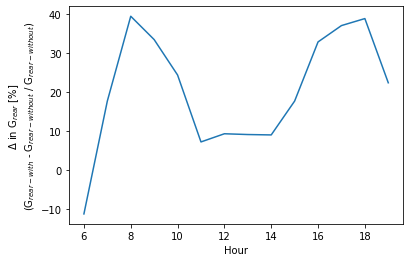

In [29]:
plt.plot(xax,hourly_rearirradiance_comparison)
plt.ylabel('$\Delta$ in G$_{rear}$ [%] \n(G$_{rear-with}$ - G$_{rear-without}$ / G$_{rear-without}$)')
plt.xlabel('Hour')